# Entrega 2: Regresión

## Imports

In [1]:
# Scientific computing
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Data analysis and manipulation
import pandas as pd

# Mapas
#!pip install folium
import folium
from folium.plugins import HeatMap

# Colormap
import branca.colormap as cm

## Penguins dataset

### Cargamos del dataset

In [3]:
penguins = pd.read_csv('penguins.csv', dtype={'species':'category', 'island': 'category', 'sex':'category'})

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.2 KB


In [5]:
atributos_categoricos = list(penguins.select_dtypes(include='category').columns)
print(atributos_categoricos)

['species', 'island', 'sex']


In [6]:
atributos_continuos = list(penguins.select_dtypes(include='float').columns)
print(atributos_continuos)

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


### Análisis exploratorio

In [7]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### Análisis univariado

In [8]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
for col in penguins.select_dtypes(include='category').columns:
    print(col)
    print('----------')
    print(penguins[col].value_counts())
    print('----------')

species
----------
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
----------
island
----------
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
----------
sex
----------
MALE      168
FEMALE    165
Name: sex, dtype: int64
----------


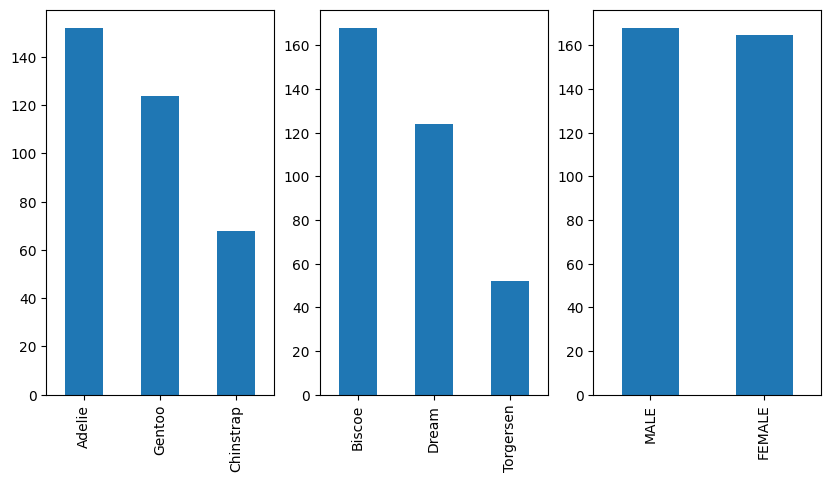

In [10]:
fig, axes = plt.subplots(1,len(atributos_categoricos),figsize=(10,5))

for i, atributo in enumerate(atributos_categoricos):
    penguins[atributo].value_counts().plot(kind='bar', ax=axes[i])

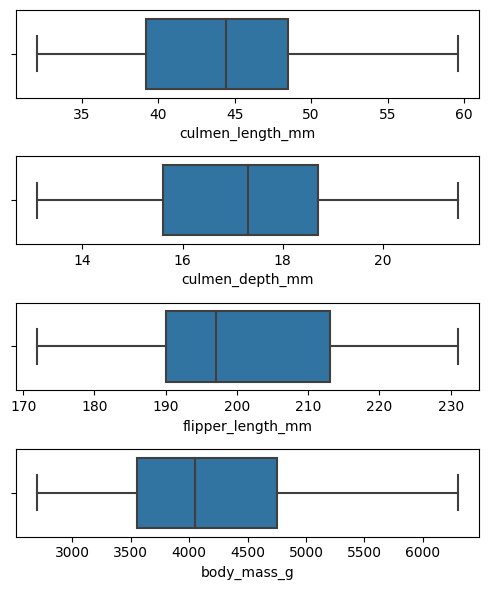

In [11]:
#Boxplots
fig, axes = plt.subplots(len(atributos_continuos),1,figsize=(5,6))

for i, atributo in enumerate(atributos_continuos):
    ax = sns.boxplot(x=atributo, ax=axes[i], data=penguins)
    ax.set_xlabel(atributo)
    
plt.tight_layout()
plt.show()

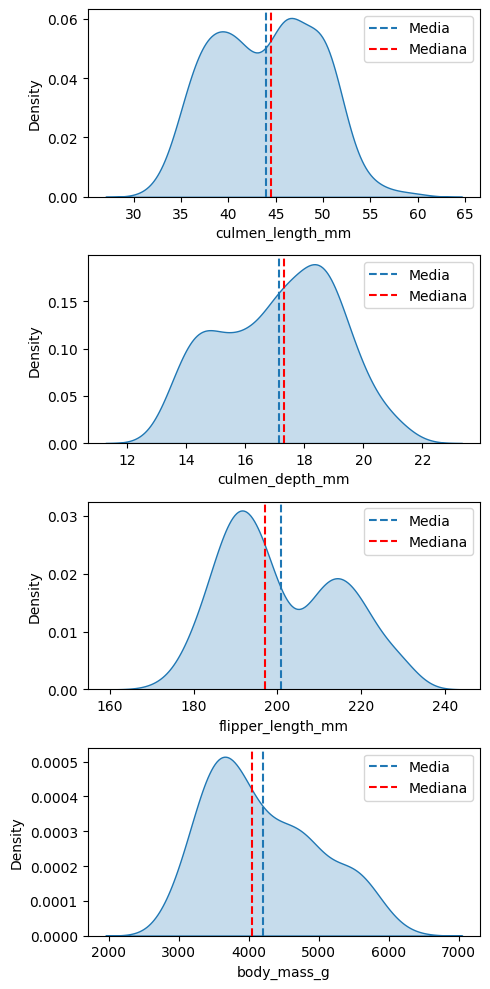

In [12]:
# Densidades
fig, axes = plt.subplots(len(atributos_continuos),1,figsize=(5,10))

for i, atributo in enumerate(atributos_continuos):
    ax = sns.kdeplot(x=atributo, ax=axes[i], data=penguins, fill=True)
    ax.set_xlabel(atributo)
    ax.axvline(x=penguins[atributo].mean(), linestyle='dashed',label='Media')
    ax.axvline(x=penguins[atributo].median(), linestyle='dashed', color='red',label='Mediana')
    ax.legend()
    
plt.tight_layout()
plt.show()

#### Análisis multivariado

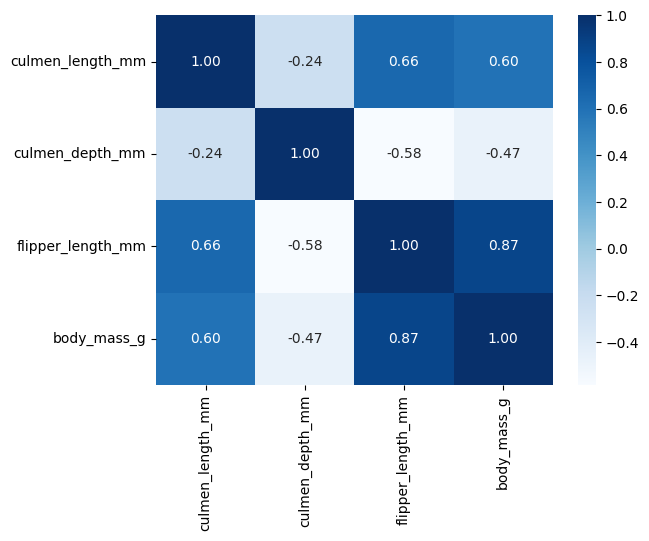

In [13]:
corr = penguins.corr(numeric_only=True)
sns.heatmap(corr, cmap="Blues", annot=True, fmt='.2f')
plt.show()

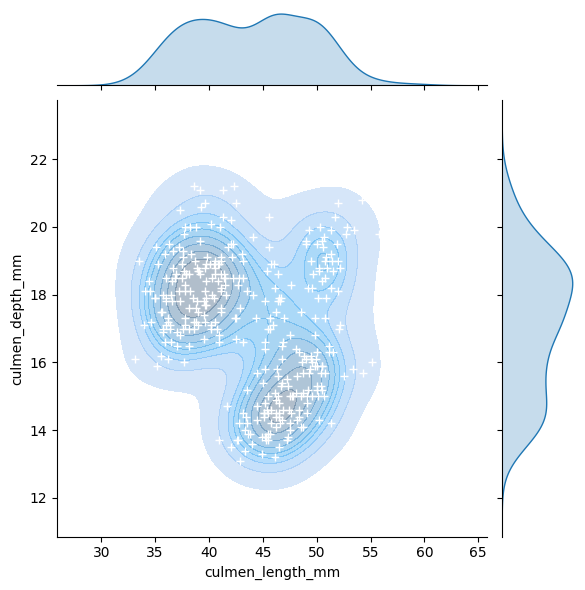

In [14]:
g = sns.jointplot(
    data=penguins,
    x=atributos_continuos[0],
    y=atributos_continuos[1],
    kind="kde",
    fill=True,
    alpha=0.4
)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
plt.show()

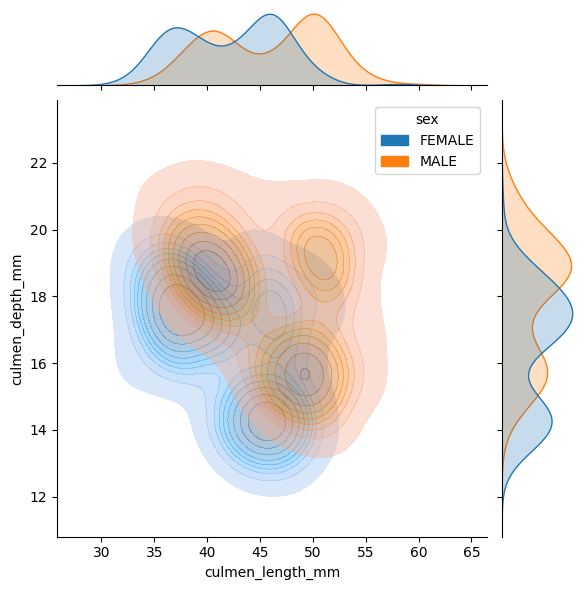

In [15]:
sns.jointplot(
    data=penguins,
    x=atributos_continuos[0],
    y=atributos_continuos[1],
    hue="sex",
    kind="kde",
    fill=True,
    alpha=0.4
)
plt.show()

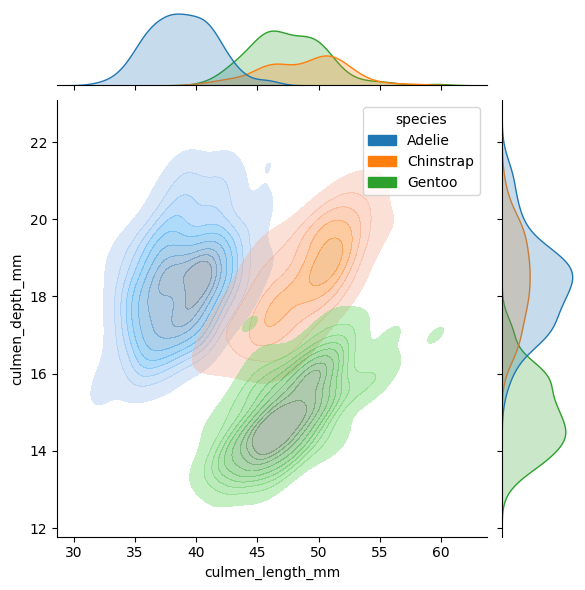

In [16]:
sns.jointplot(
    data=penguins,
    x=atributos_continuos[0],
    y=atributos_continuos[1],
    hue="species",
    kind="kde",
    fill=True,
    alpha=0.4
)
plt.show()

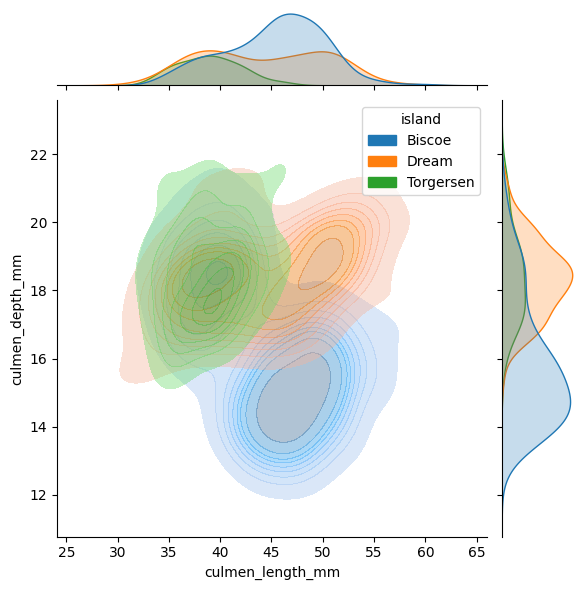

In [17]:
sns.jointplot(
    data=penguins,
    x=atributos_continuos[0],
    y=atributos_continuos[1],
    hue="island",
    kind="kde",
    fill=True,
    alpha=0.4
)
plt.show()

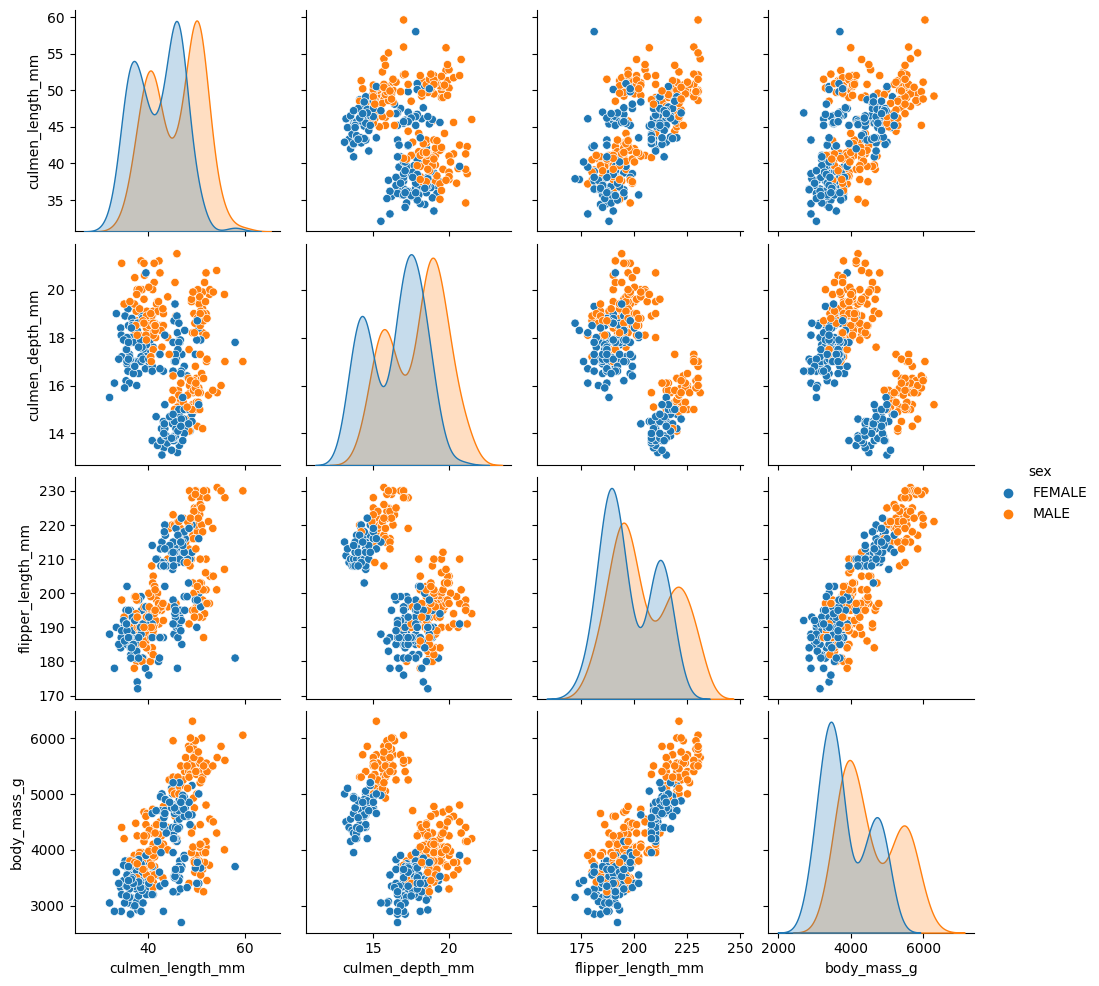

In [18]:
sns.pairplot(penguins, hue="sex")
plt.show()

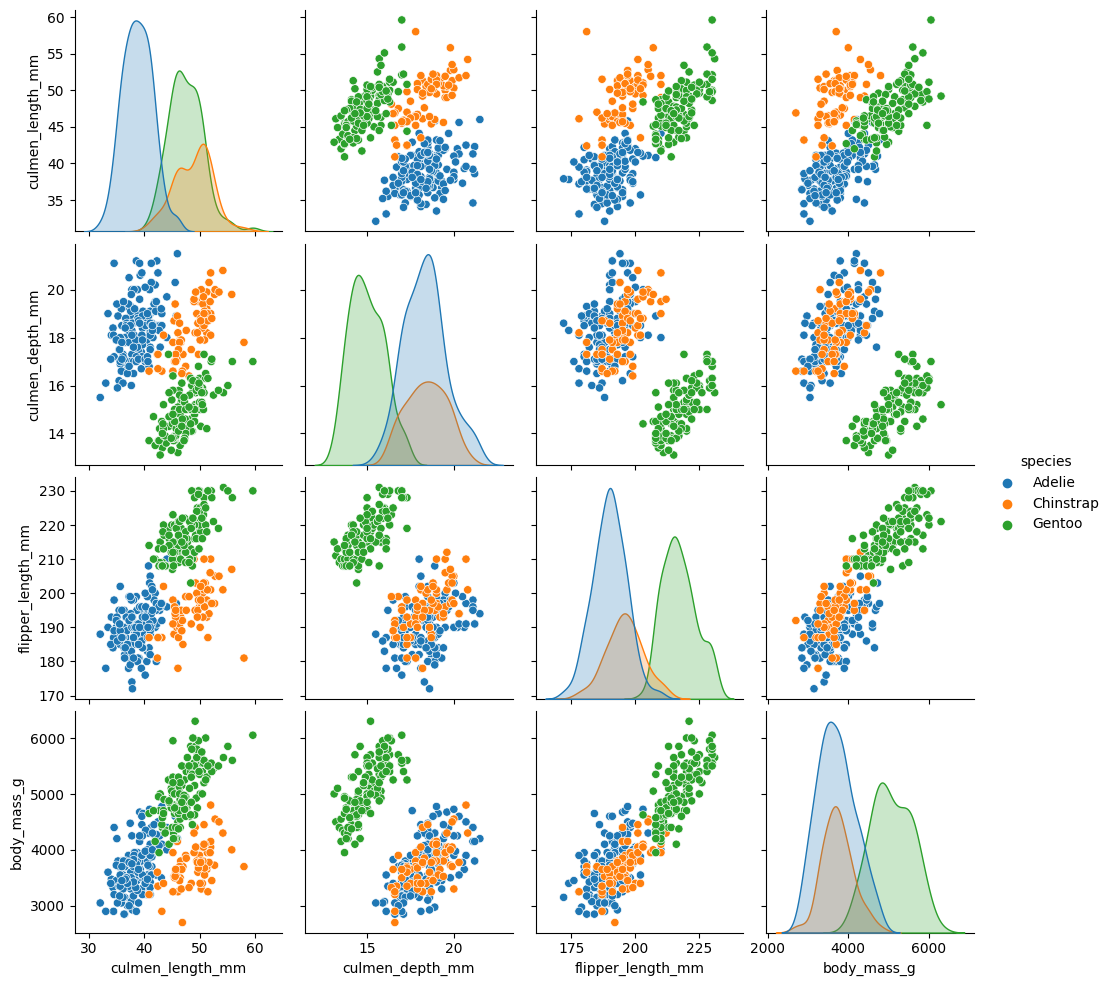

In [19]:
sns.pairplot(penguins, hue="species")
plt.show()

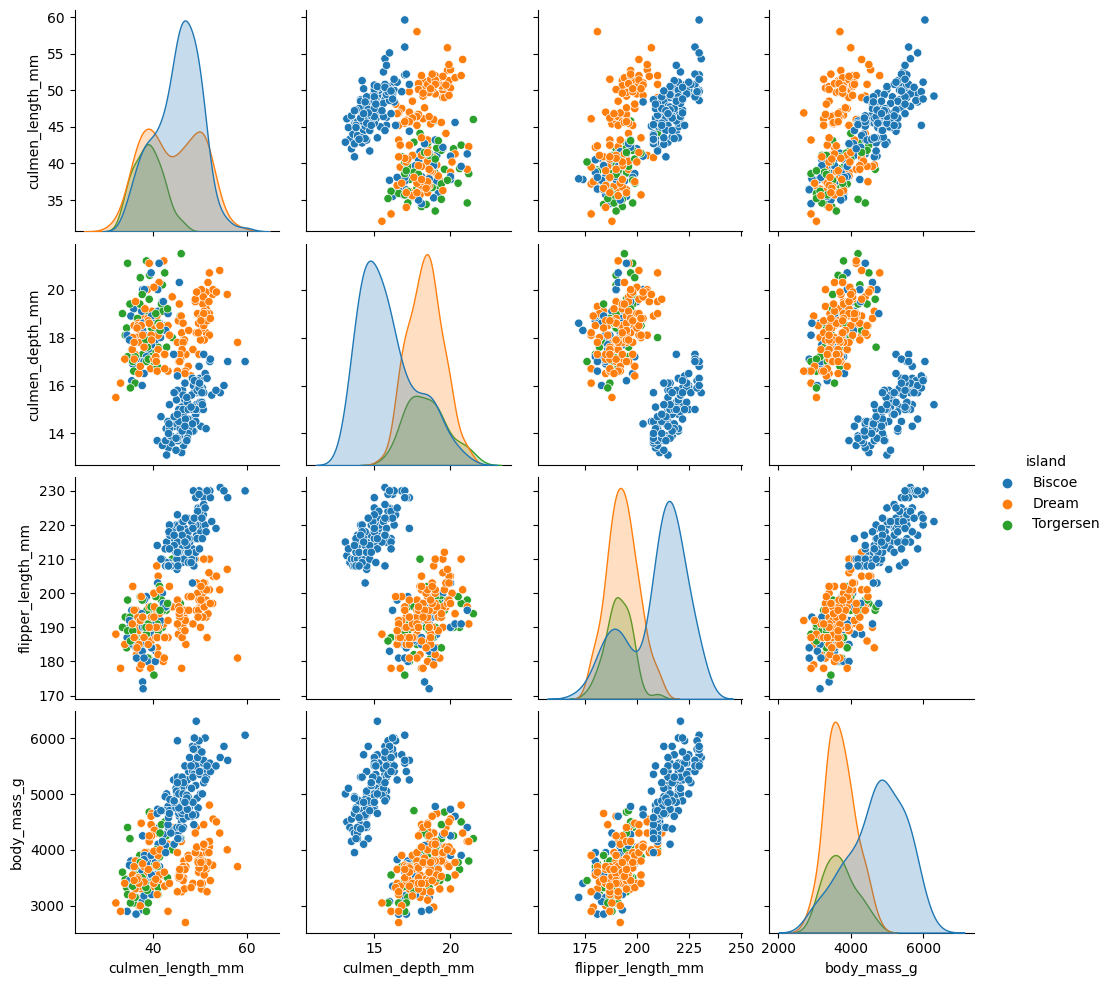

In [20]:
sns.pairplot(penguins, hue="island")
plt.show()

In [21]:
penguins_na = penguins.dropna().copy()
colors = penguins_na[['species', 'sex', 'island']].apply(tuple, axis=1)
penguins_na['colors'] = colors
penguins_na.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,colors
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,"(Adelie, MALE, Torgersen)"
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,"(Adelie, FEMALE, Torgersen)"
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,"(Adelie, FEMALE, Torgersen)"
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,"(Adelie, FEMALE, Torgersen)"
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,"(Adelie, MALE, Torgersen)"


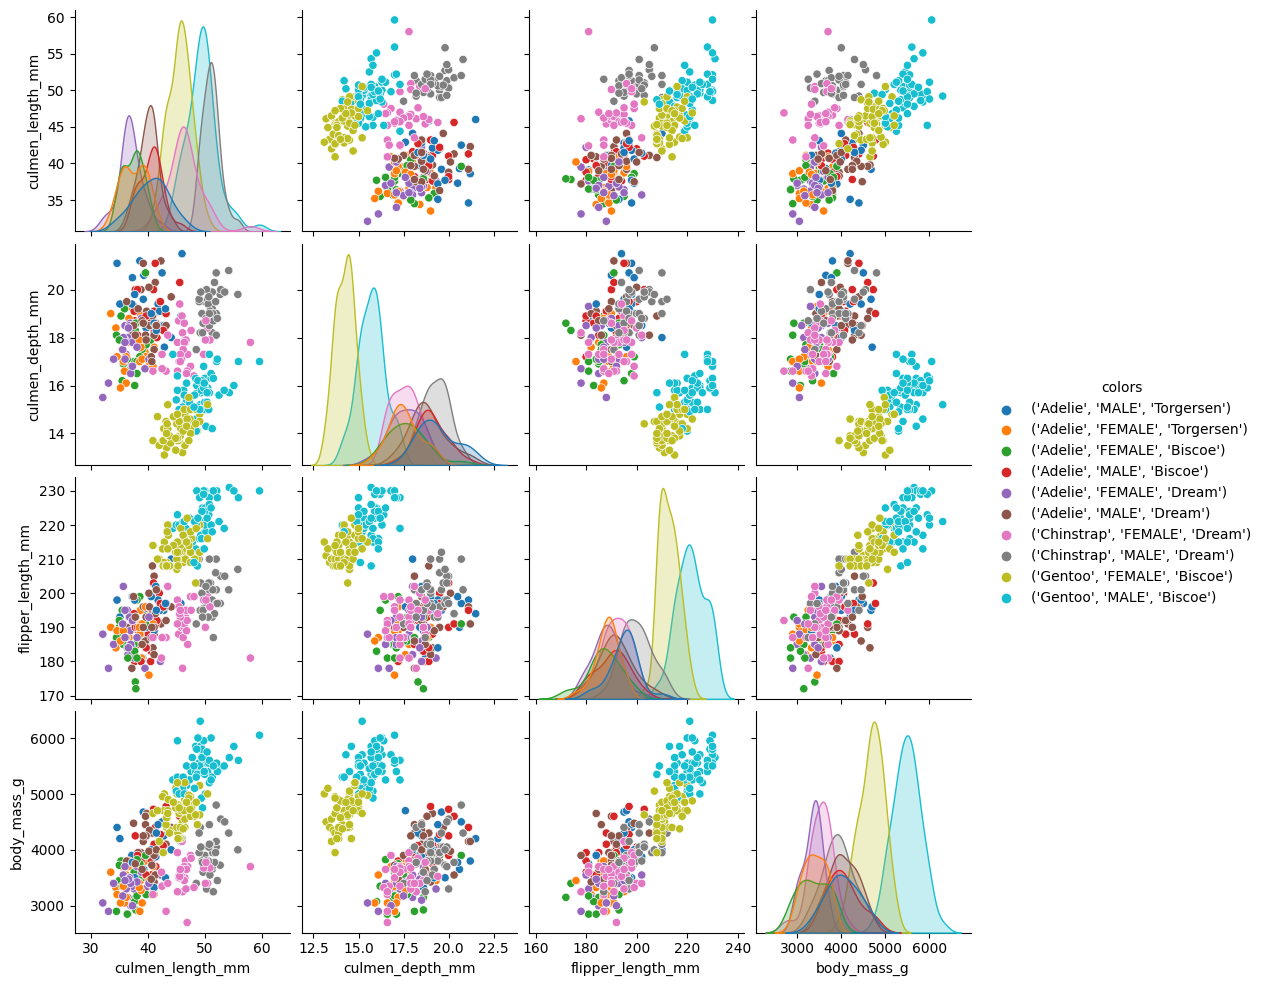

In [22]:
sns.pairplot(penguins_na, hue='colors')
plt.show()

### Análisis de regresión

In [48]:
# Progress bar
import tqdm

# Machine learning
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

#### Falta de datos
Tomar una decisión y justificarla sobre qué hacer con los datos faltantes.

In [24]:
missing_values = penguins.isna().sum()
print(missing_values)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


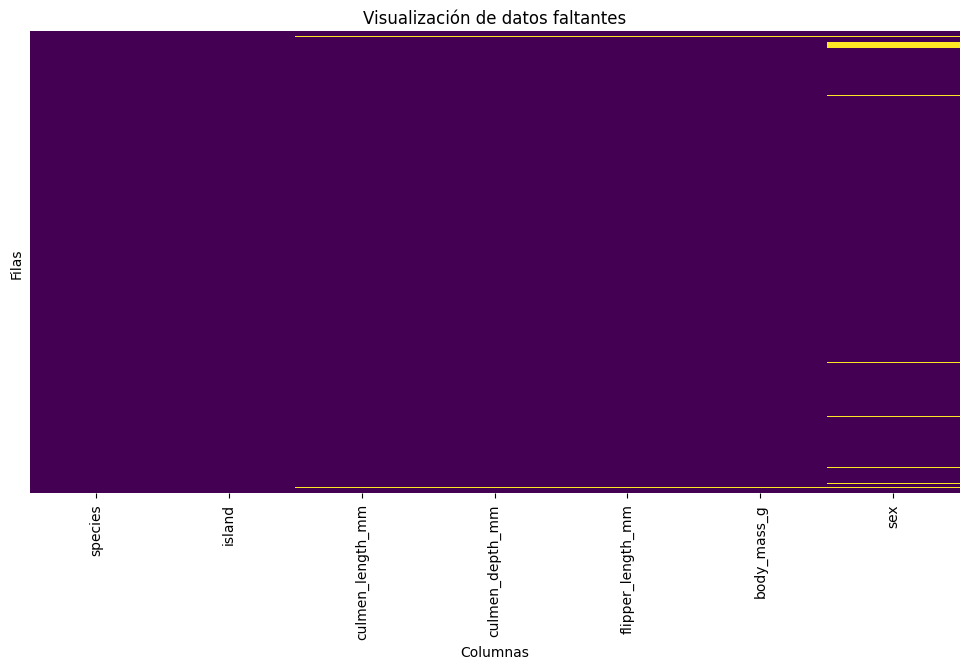

In [25]:
missing_values_mask = penguins.isna()

# Visualizar datos faltantes en un gráfico de calor
plt.figure(figsize=(12, 6))
sns.heatmap(missing_values_mask, cmap='viridis', cbar=False, yticklabels=False)
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.title('Visualización de datos faltantes')
plt.show()

> Utilizaremos el dataset sin datos faltantes. Ya que la cantidad de datos faltantes es muy pequeña en comparación con el total de datos.

#### Regresiones polinomiales
Elegir uno de los atributos continuos y realizar regresiones polinomiales variando el grado de los polinomios.

Vamos a elegir flipper_length_mm, ya que en la matriz de correlación parece estar relacionado con el peso del pinguino lo cual tiene sentido.

##### Regresión lineal K=1

In [26]:
# Pasamos a numpy para trabajar con sklearn
X = np.array(penguins_na['flipper_length_mm']).reshape(-1, 1)
y = np.array(penguins_na['body_mass_g']).reshape(-1, 1)

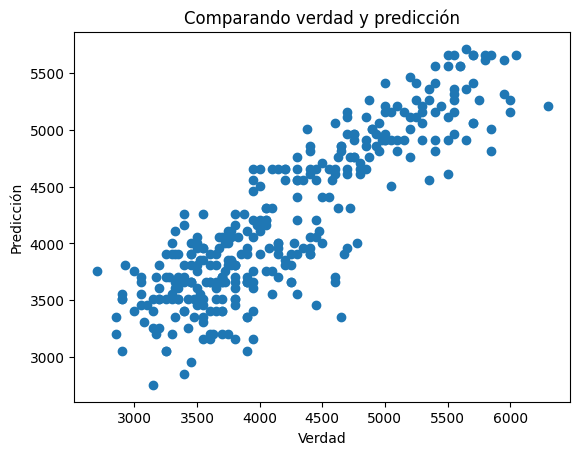

In [27]:
# Empezaos con una regresión lineal
lr = LinearRegression()
lr.fit(X, y)

# Predicción
y_pred = lr.predict(X)

plt.scatter(x=y,y=y_pred)
plt.xlabel('Verdad')
plt.ylabel('Predicción')
plt.title('Comparando verdad y predicción')
plt.show()

In [28]:
# Coeficientes
w0 = lr.intercept_
w1 = lr.coef_
print(w0,w1)

[-5872.093] [[50.153]]


In [29]:
# Root mean squared error
np.sqrt(mean_squared_error(y,y_pred))

392.1602706380618

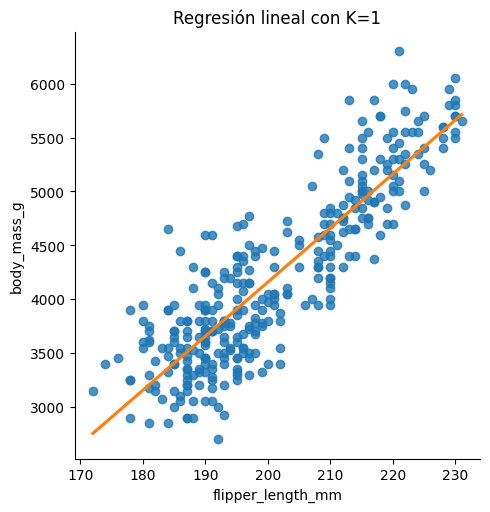

In [30]:
# Visualización
K=1
lin_reg_plot = sns.lmplot(x ="flipper_length_mm", y ="body_mass_g", data = penguins_na, order = K, ci = None, line_kws = {"color":"C1"})
plt.title("Regresión lineal con K="+str(K))
lin_reg_plot.savefig('Penguins_LR_K_'+str(K)+'.png')

##### Regresión polinomial K=2

In [31]:
# Grado del polinomio
K = 2

In [32]:
# Obtenemos los features
poly = PolynomialFeatures(degree=K, include_bias=False)
X_poly = poly.fit_transform(X)

In [ ]:
X_poly

In [34]:
# Escalamos los datos
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [ ]:
X_poly_scaled

In [36]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly_scaled, y)

LinearRegression()

In [37]:
y_pred = poly_reg.predict(X_poly_scaled)

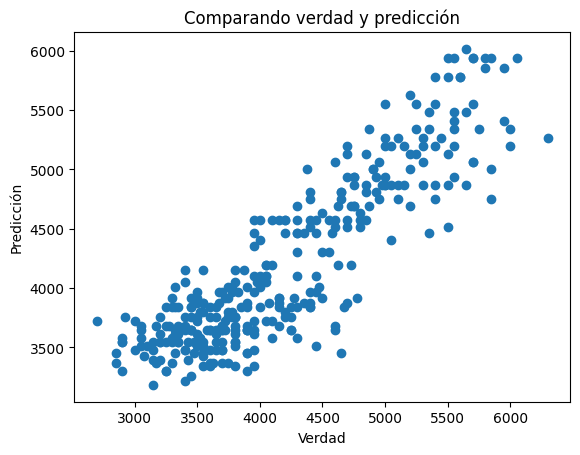

In [38]:
plt.scatter(x=y,y=y_pred)
plt.xlabel('Verdad')
plt.ylabel('Predicción')
plt.title('Comparando verdad y predicción')
plt.show()

In [39]:
# Coeficientes
w0 = poly_reg.intercept_
w1 = poly_reg.coef_
print(w0,w1)

[4207.057] [[-2401.687 3105.230]]


In [40]:
# Root mean squared error
np.sqrt(mean_squared_error(y,y_pred))

378.7640525050106

> Se observa que el error disminuye al aumentar el grado del polinomio, pero esto no significa que sea mejor. Ya que el modelo se ajusta a los datos de entrenamiento, pero no necesariamente a los datos de test.

In [41]:
# Coeficiente de determinación
poly_reg.score(X_poly_scaled,y)

0.7780684324476419

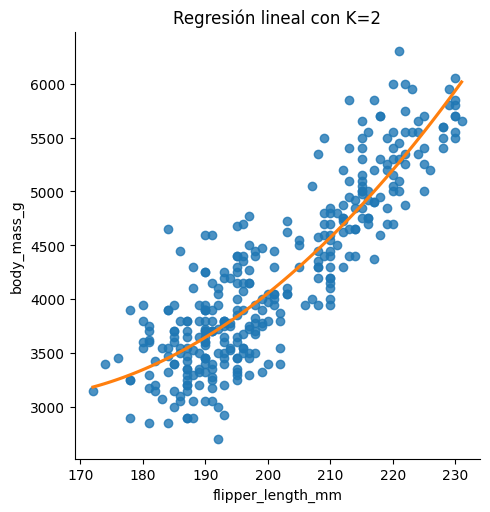

In [42]:
poly_reg_plot = sns.lmplot(x ="flipper_length_mm", y ="body_mass_g", data = penguins_na, order = K, ci = None, line_kws = {"color":"C1"})
plt.title("Regresión lineal con K="+str(K))
poly_reg_plot.savefig('Penguins_LR_K_'+str(K)+'.png')

##### Analisis grado del polinomio

Explicar qué rol juega el grado de los polinomios en el algoritmo de aprendizaje.

El grado del polinomio es el grado de la función que se ajusta a los datos. Por lo tanto, si el grado es muy bajo, la función no se ajusta bien a los datos. Si el grado es muy alto, la función se ajusta demasiado a los datos de entrenamiento, pero no necesariamente a los datos de test. Por lo tanto, el grado del polinomio es un hiperparámetro que debe ser ajustado.

##### RMSE vs grado del polinomio
Mostrar gráficamente la dependencia del RMSE y del tamaño medio de los coeficientes
con el grado de los polinomios.

In [43]:
sizes = []
rmses = []

for K in range(1,13):
    poly = PolynomialFeatures(degree=K, include_bias=False)
    X_poly = poly.fit_transform(X)

    scaler = StandardScaler()
    X_norm = scaler.fit_transform(X_poly)

    poly_reg = LinearRegression()
    poly_reg.fit(X_norm, y)
    y_pred = poly_reg.predict(X_norm)
    rmses.append(np.sqrt(mean_squared_error(y,y_pred)))
    sizes.append(np.mean(np.abs(poly_reg.coef_)))

In [44]:
rmses

[392.16027063806183,
 378.7640525050106,
 373.87384013354597,
 372.1750400620171,
 372.17342586489127,
 372.1688406327026,
 370.83746169193273,
 370.83679530433614,
 370.6013074295601,
 370.59839878808083,
 370.6024929003016,
 370.5947307269867]

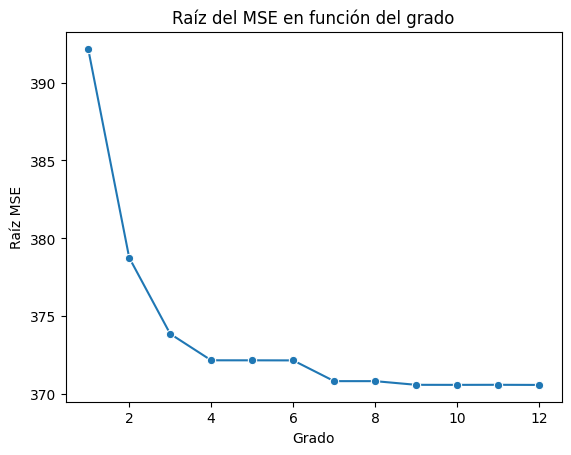

In [45]:
df_rmse = pd.DataFrame({"Grado":range(1,13), "Raíz MSE":rmses})
line_plot_rmse = sns.lineplot(
    data=df_rmse,
    x="Grado", y="Raíz MSE",
    marker='o',
    dashes=False,
    errorbar = ('ci', False)
)
plt.title("Raíz del MSE en función del grado")
line_plot_fig = line_plot_rmse.get_figure()
line_plot_fig.savefig('Penguins_rmse.png')

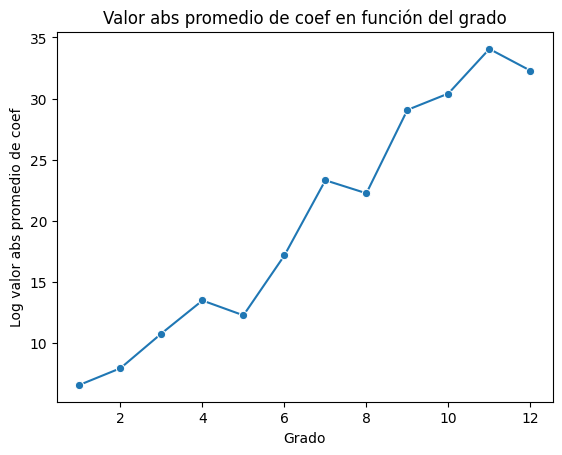

In [46]:
df_sizes = pd.DataFrame({"Grado":range(1,13), "Log valor abs promedio de coef":np.log(sizes)})
line_plot_sizes = sns.lineplot(
    data=df_sizes,
    x="Grado", y="Log valor abs promedio de coef",
    marker='o',
    dashes=False,
    errorbar = ('ci', False)
)
plt.title("Valor abs promedio de coef en función del grado")
line_plot_fig = line_plot_sizes.get_figure()
line_plot_fig.savefig('Penguins_sizes.png')

#### Atributo categorico: species


In [56]:
# Codificación one-hot del atributo categórico
encoder = OneHotEncoder(sparse_output=False)
atributo_categorico_encoded = encoder.fit_transform(penguins_na[['species']])

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(atributo_categorico_encoded, penguins_na['body_mass_g'], test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
reg = LinearRegression()
reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = reg.predict(X_test)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'R^2: {r2:.4f}')

MSE: 206768.3134
R^2: 0.6718


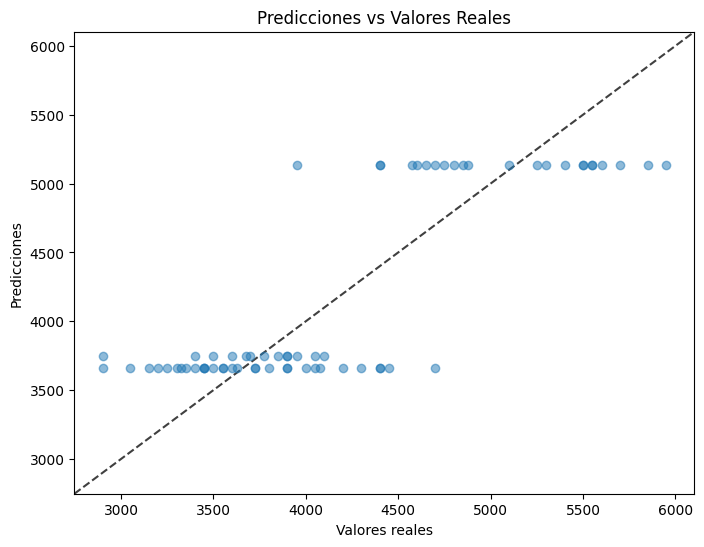

In [57]:
# Crear un gráfico de dispersión para comparar las predicciones y los valores reales
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, y_pred, alpha=0.5)
ax.set_xlabel('Valores reales')
ax.set_ylabel('Predicciones')

# Agregar una línea de identidad (diagonal) para facilitar la comparación
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.title('Predicciones vs Valores Reales')
plt.show()

##### Analisis de coeficientes


In [61]:
coeficientes = reg.coef_

# Imprimir los coeficientes
print("Coeficientes del modelo de regresión lineal:")
print(coeficientes)

categorias = encoder.get_feature_names_out(['species'])

# Mostrar coeficientes junto con sus categorías correspondientes
print("Coeficientes del modelo de regresión lineal con categorías:")
for categoria, coef in zip(categorias, coeficientes):
    print(f"{categoria}: {coef}")

Coeficientes del modelo de regresión lineal:
[81249060896084592.000 81249060896084672.000 81249060896086064.000]
Coeficientes del modelo de regresión lineal con categorías:
species_Adelie: 8.124906089608459e+16
species_Chinstrap: 8.124906089608467e+16
species_Gentoo: 8.124906089608606e+16


> La regresion lineal no parece ser adecuada para este caso, ya que el error parece bastante notorio. Con solo saber la especie u otra caracteristica categorica parece ser demasiado amplio para tener una buen predicción.




#### KNN


##### Sesgo KNN

El sesgo inductivo en KNN es la suposición de que los puntos cercanos en el espacio de características tienen valores similares de la variable objetivo. En este caso, KNN utiliza la distancia euclidiana para determinar los vecinos más cercanos y promedia sus valores de body_mass_g para hacer una predicción.

##### Entrenar y evaluar un modelo KNN

In [118]:
# Cargar datos + dividir conjunto de entrenamiento y prueba

# Seleccionar dos atributos continuos y el target
X = penguins_na[["culmen_length_mm", "flipper_length_mm"]]
y = penguins_na["body_mass_g"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [119]:
rmses = []

for k in range(1,16):
    
    knn_reg = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn_reg.fit(X_train,y_train)
    
    y_pred_knn = knn_reg.predict(X_test)
    rmses.append(mean_squared_error(y_test, y_pred_knn, squared=False))


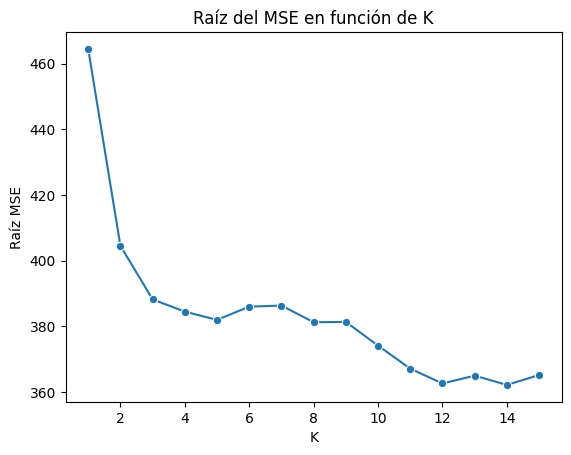

In [120]:
df_rmse = pd.DataFrame({"K":range(1,16), "Raíz MSE":rmses})
line_plot_rmse = sns.lineplot(
    data=df_rmse,
    x="K", y="Raíz MSE",
    marker='o',
    dashes=False,
    errorbar = ('ci', False)
)
plt.title("Raíz del MSE en función de K")
line_plot_fig = line_plot_rmse.get_figure()
line_plot_fig.savefig('knn_rmse.png')

In [121]:
# Vamos a utilizar K=5

# Crear y entrenar un modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predecir y calcular el RMSE para el modelo KNN
y_pred_knn = knn.predict(X_test)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
print("RMSE del modelo KNN:", rmse_knn)

RMSE del modelo KNN: 381.9623672562521


##### Graficas fronteras

In [145]:
X_train.values[:, 0]

array([48.700, 38.600, 35.200, 48.200, 49.300, 48.400, 45.700, 45.500,
       40.100, 32.100, 46.100, 39.700, 44.900, 46.200, 36.500, 39.600,
       50.500, 37.900, 58.000, 35.700, 45.400, 45.300, 46.500, 50.500,
       36.400, 46.500, 40.600, 38.300, 36.300, 50.200, 40.600, 35.300,
       36.600, 44.500, 42.000, 41.400, 39.000, 49.500, 50.700, 50.800,
       35.000, 36.600, 37.800, 50.000, 42.300, 38.100, 55.800, 48.400,
       51.300, 48.200, 49.300, 42.700, 55.100, 39.600, 41.100, 50.000,
       38.100, 36.200, 59.600, 37.700, 37.600, 43.200, 37.900, 47.600,
       52.000, 46.400, 45.800, 41.300, 46.300, 39.100, 39.200, 42.600,
       48.500, 47.600, 45.200, 49.000, 37.300, 42.700, 46.200, 47.300,
       36.000, 51.900, 46.800, 36.400, 45.200, 39.700, 39.200, 36.200,
       49.900, 35.900, 45.200, 39.500, 46.000, 40.300, 36.900, 49.500,
       45.400, 46.400, 43.300, 41.400, 44.400, 52.500, 36.500, 40.900,
       45.800, 41.100, 50.500, 40.900, 45.100, 43.600, 45.100, 48.700,
      

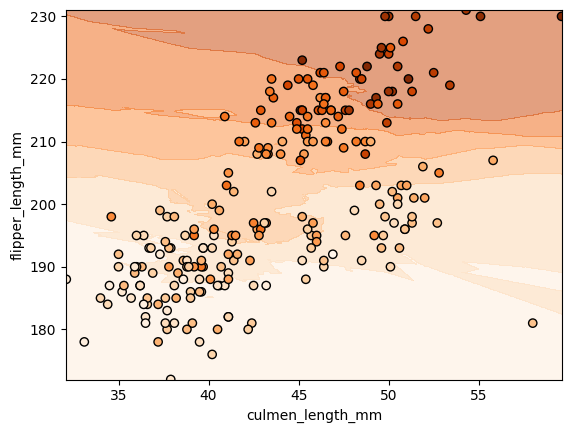

In [146]:
# Graficamos la hipotesis obtenida
ax = plt.subplot(1, 1, 1)
disp=DecisionBoundaryDisplay.from_estimator(
    knn_reg,
    X_train,
    response_method="predict",
    ax=ax,
    xlabel="culmen_length_mm",
    ylabel="flipper_length_mm",
    eps=0.02,
    grid_resolution = 1000,
    alpha=0.5, 
    cmap='Oranges'
    )

# Plotting the data points    
disp.ax_.scatter(X_train.values[:, 0], X_train.values[:, 1], 
                 c=y_train, edgecolor="k",
                 cmap='Oranges')
plt.show()

#### Árboles de decisión

##### Sesgo Árboles de decisión
El sesgo inductivo en los árboles de decisión es la suposición de que la variable objetivo puede ser aproximada por una función de decisión jerárquica y recursiva. En este caso, el árbol de decisión divide el espacio de características en regiones rectangulares y asigna un valor constante de body_mass_g a cada región.

##### Entrenar y evaluar un modelo de árbol de decisión

In [128]:
rmses = []

for deep in range(1,10):
    # Crear y entrenar un modelo de árbol de decisión
    tree = DecisionTreeRegressor(max_depth=deep, min_samples_leaf=5)
    tree.fit(X_train, y_train)

    # Predecir y calcular el RMSE para el modelo de árbol de decisión
    y_pred_tree = tree.predict(X_test)
    rmses.append(mean_squared_error(y_test, y_pred_tree, squared=False))


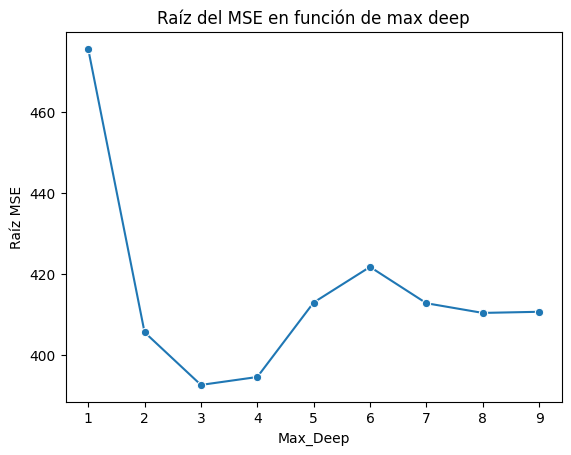

In [130]:
df_rmse = pd.DataFrame({"Max_Deep":range(1,10), "Raíz MSE":rmses})
line_plot_rmse = sns.lineplot(
    data=df_rmse,
    x="Max_Deep", y="Raíz MSE",
    marker='o',
    dashes=False,
    errorbar = ('ci', False)
)
plt.title("Raíz del MSE en función de max deep")
line_plot_fig = line_plot_rmse.get_figure()
line_plot_fig.savefig('tree_rmse.png')

In [131]:
# Vamos a usar max_deep = 3

# Crear y entrenar un modelo de árbol de decisión
tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
tree.fit(X_train, y_train)

# Predecir y calcular el RMSE para el modelo de árbol de decisión
y_pred_tree = tree.predict(X_test)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
print("RMSE del modelo de árbol de decisión:", rmse_tree)


RMSE del modelo de árbol de decisión: 392.52851657214376


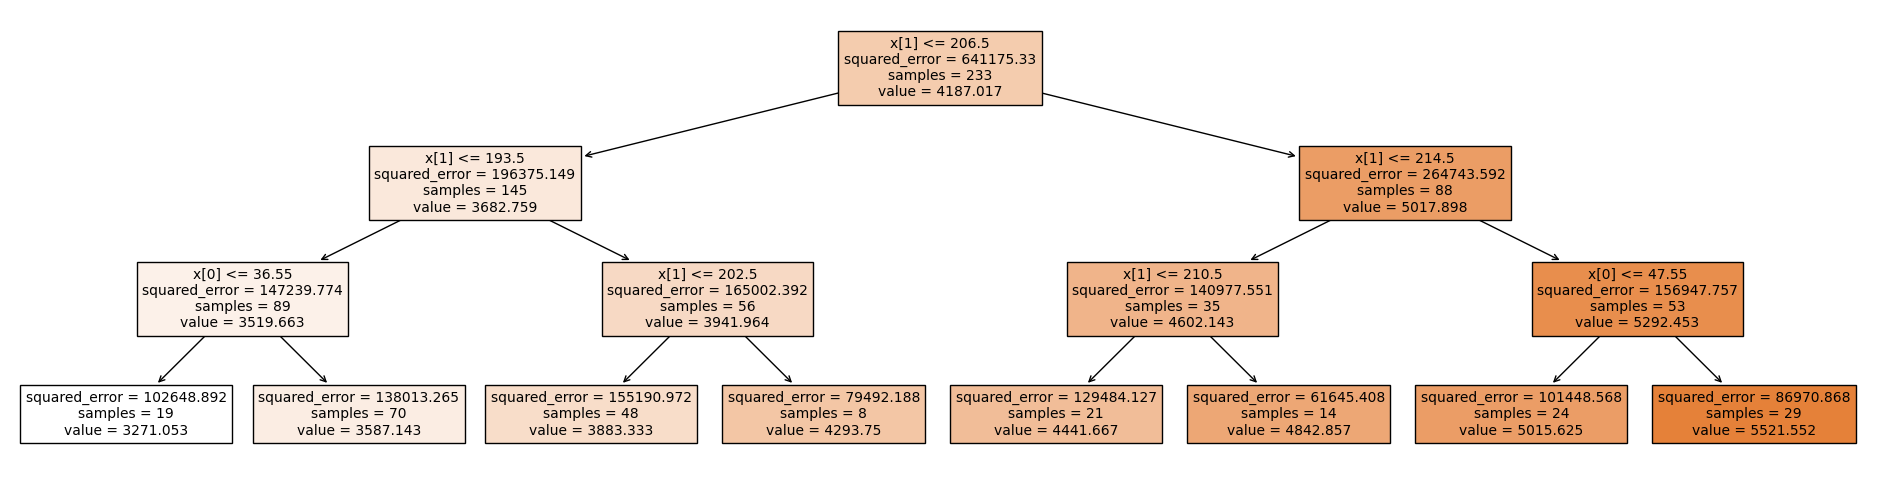

In [132]:
# Graficamos el arbol
plt.figure(figsize=(24,6))
plot_tree(tree,filled=True,fontsize=10)
plt.savefig('arbol_dim_3.png')

##### Grafica de fronteras

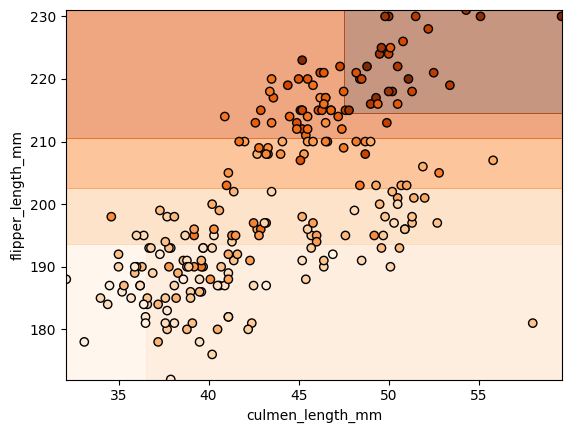

In [147]:
# Graficamos la hipotesis obtenida
ax = plt.subplot(1, 1, 1)
disp=DecisionBoundaryDisplay.from_estimator(
    tree,
    X_train,
    response_method="predict",
    ax=ax,
    xlabel="culmen_length_mm",
    ylabel="flipper_length_mm",
    eps=0.02,
    grid_resolution = 1000,
    alpha=0.5, 
    cmap='Oranges'
    )

# Plotting the data points    
disp.ax_.scatter(X_train.values[:, 0], X_train.values[:, 1], 
                 c=y_train, edgecolor="k",
                 cmap='Oranges')
plt.savefig('boundary_dim_2.png')


## California dataset

### Cargamos del dataset

In [ ]:
# Cargamos el dataset
california_housing = fetch_california_housing()

In [ ]:
# diabetes es un objeto tipo diccionario
california_housing.keys()

In [ ]:
# Item de descripción
print(california_housing.DESCR)

In [ ]:
# Nombres de las features o variables predictoras
atributos = california_housing.feature_names
print(atributos)

In [ ]:
# Extraemos los numpy arrays
X = california_housing.data 
y = california_housing.target

### Análisis exploratorio

In [ ]:
# Convertimos a pandas dataframe 
california = pd.DataFrame(data=X, columns=california_housing.feature_names)
california['target'] = pd.Series(y, dtype='float')

In [ ]:
# Número de filas y columnas en el data frame
california.shape

In [ ]:
# Visualización
california.head()

In [ ]:
california.info()

In [ ]:
california.describe()

#### Dependencia espacial

In [ ]:
sns.scatterplot(data=california,
                x="Longitude",
                y="Latitude",
                size="target",
                hue="target",
                palette="viridis",
                alpha=0.5)
plt.legend(title="MedHouseVal",
           bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
plt.title("Median house value en función de\n la ubicación espacial")
plt.show()

#### (Opcional) Scatterplot sobre mapa geográfico

In [ ]:
# Obtenemos el centro del mapa
centerlat = (california['Latitude'].max() + california['Latitude'].min()) / 2
centerlong = (california['Longitude'].max() + california['Longitude'].min()) / 2

center = centerlat, centerlong

# Creamos el mapa
m = folium.Map(location=center, zoom_start=5)

# agregamos punto para cada observación
for i in range(len(california)):
    folium.Circle(
        location=[california.iloc[i]['Latitude'], california.iloc[i]['Longitude']],
        radius=10,
    ).add_to(m)

# Mostramos el mapa en consola
m

In [ ]:
# Creamos un LinearColorMap
# El colormap es verde para 0 y rojo para 5
colormap = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=0, vmax=5)

# Creamos un mapa, esta vez con un tile style
m = folium.Map(location=center, zoom_start=5, tiles='Stamen Toner')

# Agregamos las observaciones
# Esta vez con color según el valor
for i in range(len(california)):
    folium.Circle(
        location=[california.iloc[i]['Latitude'], california.iloc[i]['Longitude']],
        radius=10,
        fill=True,
        color=colormap(california.iloc[i]['target']),
        fill_opacity=0.2
    ).add_to(m)

# agregamos la escala de colores
m.add_child(colormap)

# Mostramos el mapa
m

In [ ]:
# creamos el mapa
m = folium.Map(location=center, zoom_start=5)

# ploteamos el heatmap
HeatMap(data=california[['Latitude',
                         'Longitude',
                         'target']].groupby(['Latitude',
                                             'Longitude']).sum().reset_index().values.tolist(),
        radius=8,
        max_zoom=13).add_to(m)

# mostramos el mapa
m

#### Análisis univariado

In [ ]:
plt.figure(figsize=(5,1))
sns.boxplot(x='target', data=california)
plt.show()

In [ ]:
sns.kdeplot(x='target', data=california, fill=True)
plt.axvline(x=california['target'].mean(), linestyle='dashed',label='Media')
plt.axvline(x=california['target'].median(), linestyle='dashed', color='red',label='Mediana')
plt.legend()
plt.show()

In [ ]:
#Boxplots
fig, axes = plt.subplots(len(atributos),1,figsize=(5,10))

for i, atributo in enumerate(atributos):
    ax = sns.boxplot(x=atributo, ax=axes[i], data=california)
    ax.set_xlabel(atributo)
    
plt.tight_layout()
plt.show()

In [ ]:
# Outliers
Q1 = california.quantile(0.25)
Q3 = california.quantile(0.75)
IQR = Q3 - Q1

((california < (Q1 - 1.5 * IQR)) | (california > (Q3 + 1.5 * IQR))).sum()*100/len(california)

In [ ]:
# Densidades
fig, axes = plt.subplots(len(atributos),1,figsize=(5,20))

for i, atributo in enumerate(atributos):
    ax = sns.kdeplot(x=atributo, ax=axes[i], data=california, fill=True)
    ax.set_xlim((Q1 - 1.5 * IQR)[atributo],(Q3 + 1.5 * IQR)[atributo])
    ax.set_xlabel(atributo)
    ax.axvline(x=california[atributo].mean(), linestyle='dashed',label='Media')
    ax.axvline(x=california[atributo].median(), linestyle='dashed', color='red',label='Mediana')
    ax.legend()
    
plt.tight_layout()
plt.show()

#### Análisis multivariado

In [ ]:
corr = california.corr()
sns.heatmap(corr, cmap="Blues", annot=True, fmt='.2f')
plt.show()

In [ ]:
sns.scatterplot(data=california,
              x='MedInc',
              y='target'
             )
plt.show()

In [ ]:
sns.jointplot(data=california,
              x='MedInc',
              y='target',
              kind="kde",
              fill=True
             )
plt.show()